# Black Friday Dataset EDA and Feature Engineering

Cleaning and preparing the data for model training

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [230]:
#importing the dataset
df = pd.read_csv("blackfriday.csv")

In [231]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [233]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [234]:
#As user_Id is of no use , so drop it
df.drop(["User_ID"],axis = 1,inplace=True)

In [235]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  object 
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  object 
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          376430 non-null  float64
 9   Product_Category_3          166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 46.2+ MB


# Handling Categorical features

In [237]:
#we can use  map function to convert Gender format from object to int
df["Gender"]=df["Gender"].map({"F":0,"M":1})

In [238]:
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [239]:
df.Age.isnull().sum()

0

In [240]:
#Converting categorical features of age to numerical features
#Here we are not using pd.get_dummies method we will do targe guiding instead as because it may be that there are various age group that will do more or less shopping according to their age
#so we will use map function 
age_mapping = {'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7}


df["Age"]=df["Age"].map(age_mapping)

In [241]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


In [242]:
#city_category
df_city=pd.get_dummies(df["City_Category"],drop_first="True")

In [243]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [244]:
#combining df_city with df
df = pd.concat([df,df_city],axis = 1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969,0,1


In [245]:
#Now dropping city categories
df.drop(["City_Category"],axis = 1,inplace=True)

In [246]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969,0,1


In [247]:
#Now checking for null values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
B                                  0
C                                  0
dtype: int64

In [248]:
#converting categorical value of stay_in_current_city_years to numerical form
df["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [249]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("+","")
df.head()

C:\Users\anshu\AppData\Local\Temp\ipykernel_8696\2045213159.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].str.replace("+","")


,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057,0,0
4,P00285442,1,7,16,4,0,8,NaN,NaN,7969,0,1


In [250]:
#Here in  Stay_in_Current_City_years the values are still in object dtype
#So we will use astype to convert it into the integer
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].astype(int)

In [251]:
#now check dtype
df.Stay_In_Current_City_Years.dtype

dtype('int32')

In [252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  uint8  
 11  C                           550068 non-null  uint8  
dtypes: float64(2), int32(1), int64(6), object(1), uint8(2)
memory usage: 40.

In [253]:
#Now converting B and C to int type
df["B"]=df["B"].astype(int)
df["C"]=df["C"].astype(int)

In [254]:
#Now checking data type of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  int32  
 11  C                           550068 non-null  int32  
dtypes: float64(2), int32(3), int64(6), object(1)
memory usage: 44.1+ MB


# Some data exploration for replacing null values of Product_Category_2 and Product_Category_3

In [255]:
#Product_Category_1
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [256]:
dict(df.Product_Category_2.value_counts())

{8.0: 64088,
 14.0: 55108,
 2.0: 49217,
 16.0: 43255,
 15.0: 37855,
 5.0: 26235,
 4.0: 25677,
 6.0: 16466,
 11.0: 14134,
 17.0: 13320,
 13.0: 10531,
 9.0: 5693,
 12.0: 5528,
 10.0: 3043,
 3.0: 2884,
 18.0: 2770,
 7.0: 626}

In [257]:
df.Product_Category_2.mode()[0]

8.0

In [258]:
#replacing the missing values with mode
df["Product_Category_2"]=df["Product_Category_2"].fillna(df["Product_Category_3"].mode()[0])

In [259]:
#replcing the missing values of Product_Category_3
df["Product_Category_3"]=df["Product_Category_3"].fillna(df["Product_Category_3"].mode()[0])

In [275]:
#converting the datatype to integer from float
df["Product_Category_2"]=df["Product_Category_2"].astype(int)
df["Product_Category_3"]=df["Product_Category_3"].astype(int)

In [260]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

# Graph analysis

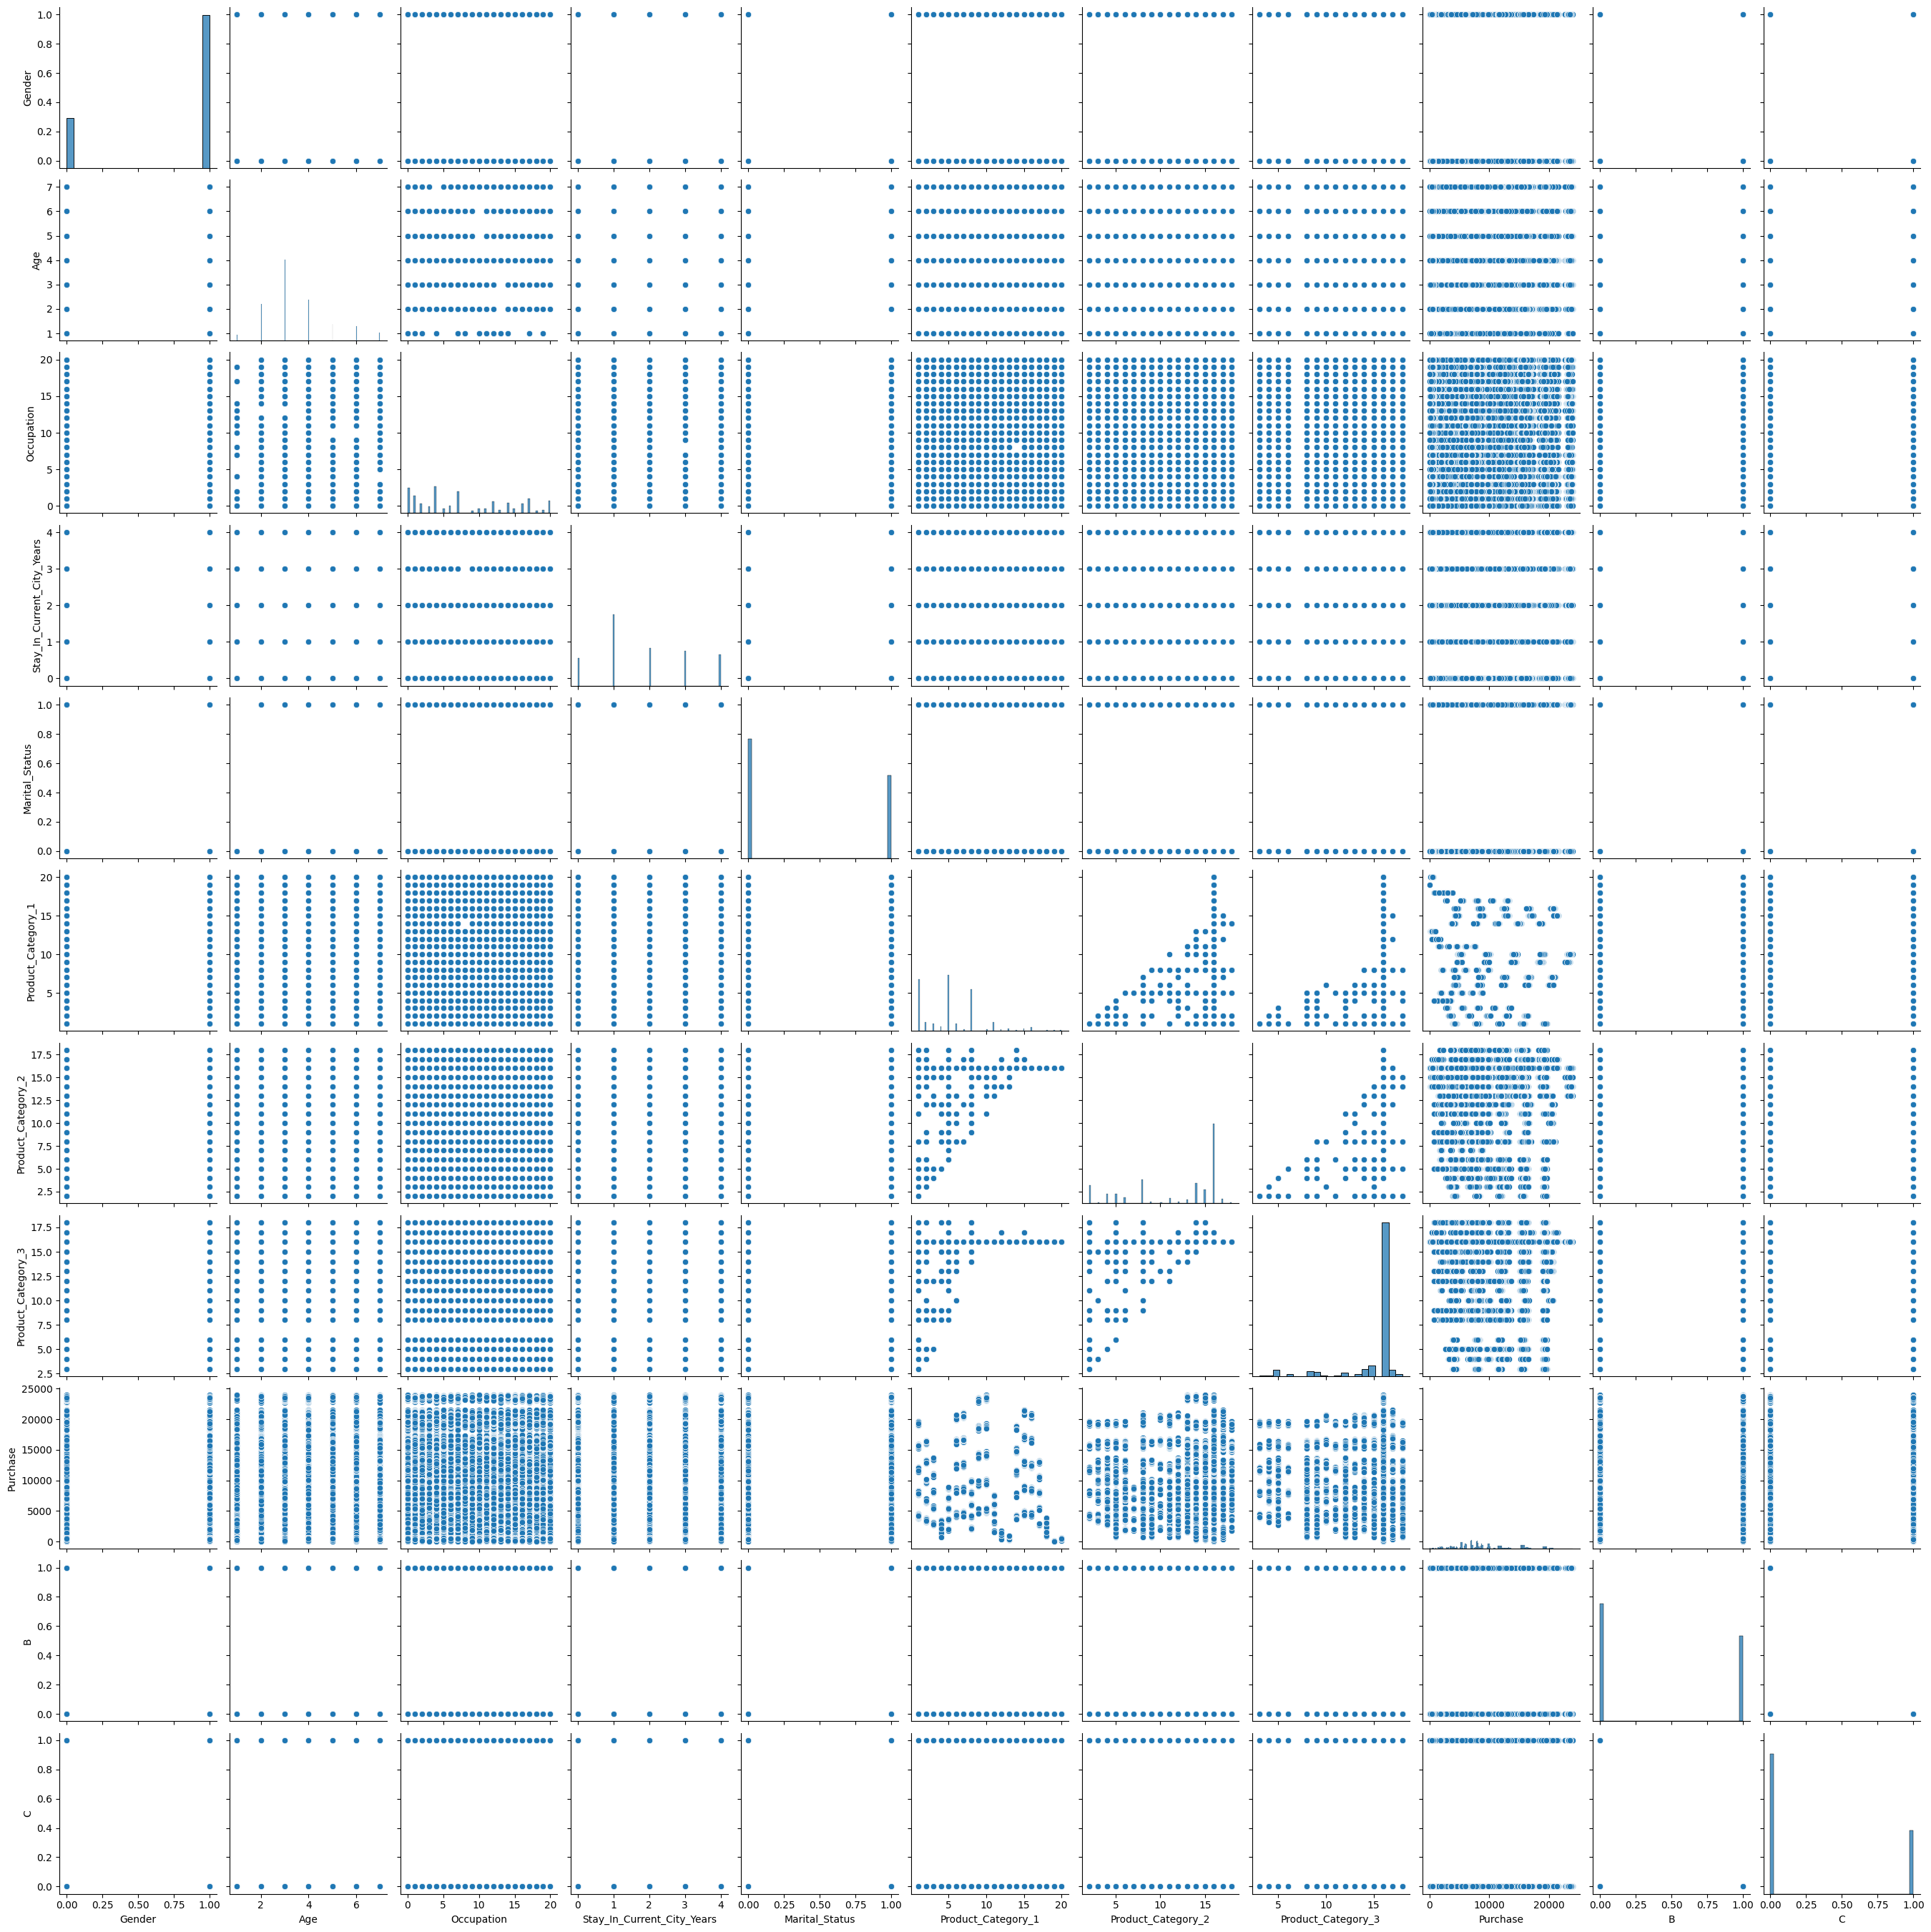

In [261]:
sns.pairplot(df)

C:\Users\anshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

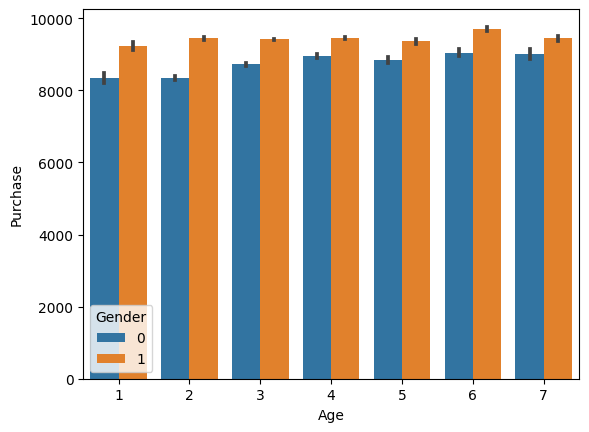

In [262]:
#barplot
sns.barplot("Age","Purchase",hue="Gender",data = df)

here purchasing of male over female is high

C:\Users\anshu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

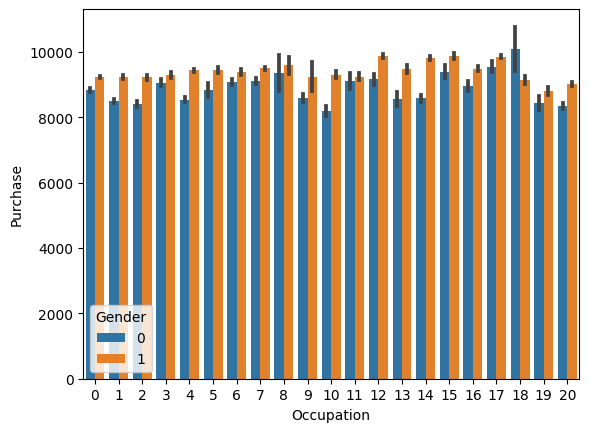

In [263]:
sns.barplot("Occupation","Purchase",hue="Gender",data=df)

female with occupation 18 has higher purchase

In [265]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,16.0,16.0,8370,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200,0,0
2,P00087842,0,1,10,2,0,12,16.0,16.0,1422,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057,0,0
4,P00285442,1,7,16,4,0,8,16.0,16.0,7969,0,1


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

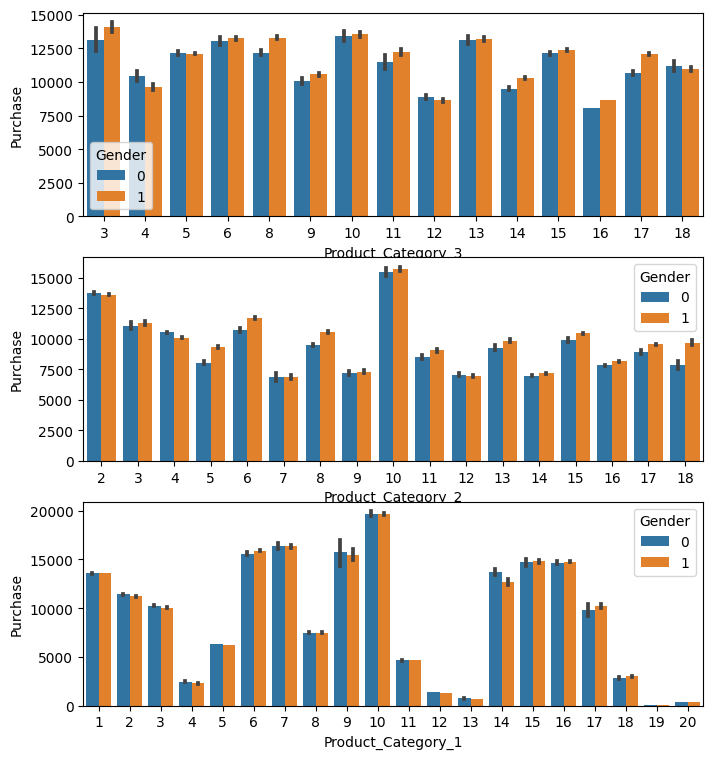

In [276]:
fig, (ax1,ax2,ax3)=plt.subplots(3,1,figsize=(8,9))
sns.barplot(x="Product_Category_3",y="Purchase",hue="Gender",data=df,ax=ax1)
sns.barplot(x="Product_Category_2",y="Purchase",hue="Gender",data=df,ax=ax2)
sns.barplot(x="Product_Category_1",y="Purchase",hue="Gender",data=df,ax=ax3)

Purchase in Product_Category_1 with 10 is highest


Purchase in Product_Category_2 with 10 is highest


Purchase in Product_Category_3 with 3 is highest

# Feature Scaling

In [277]:
df_test = df[df['Purchase'].isnull()]

In [279]:
df_train =df[~df["Purchase"].isnull()]

In [280]:
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,16,16,8370,0,0
1,P00248942,0,1,10,2,0,1,6,14,15200,0,0
2,P00087842,0,1,10,2,0,12,16,16,1422,0,0
3,P00085442,0,1,10,2,0,12,14,16,1057,0,0
4,P00285442,1,7,16,4,0,8,16,16,7969,0,1


In [293]:
df_train.drop("Product_ID",axis=1,inplace=True)

In [286]:
from sklearn.model_selection import train_test_split

In [295]:
X= df_train.drop("Purchase",axis=1)
y = df_train["Purchase"]

In [297]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [298]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(X_train)
sc.fit_transform(X_test)

array([[ 0.57119947, -0.36796258,  1.37152099, ..., -0.35502638,
         1.1723493 , -0.67003787],
       [ 0.57119947, -0.36796258,  0.44981585, ...,  0.37016558,
         1.1723493 , -0.67003787],
       [-1.7507019 , -0.36796258, -0.93274185, ...,  0.37016558,
         1.1723493 , -0.67003787],
       ...,
       [ 0.57119947,  1.11088673, -1.23997689, ...,  0.37016558,
        -0.8529881 , -0.67003787],
       [ 0.57119947, -1.10738723, -0.93274185, ...,  0.37016558,
         1.1723493 , -0.67003787],
       [ 0.57119947, -1.10738723, -0.6255068 , ...,  0.37016558,
         1.1723493 , -0.67003787]])